# Telco Customer Churn Project

## Objectives: to determine what factors drive customer churn


In [1]:
#initial imports

import acquire
import prepare
import explore
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
import warnings
import scipy

#import sklearn methods
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score

#turns off any warnings in function outputs
warnings.filterwarnings("ignore")

## Preparation

## Decisions made in preparation:

1. To drop any duplicate columns
2. To drop the columns that contain duplicate information
4. Creating dummy columns of string variables for modeling purposes

In [145]:
df = acquire.get_telco_data()

In [82]:
df.total_charges = df.total_charges.str.replace(' ','0.0')

In [84]:
df.total_charges = df.total_charges.astype(float)

In [87]:
round(df.total_charges.sum()/5,2)

3211233.74

In [247]:
df['monthly_charges'].median() * 12

844.1999999999999

In [4]:
(14 * 777)/2

5439.0

In [146]:
train, validate, test = prepare.prep_telco_data(df)

In [91]:
df.columns


Index(['Unnamed: 0', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'payment_type', 'contract_type',
       'internet_service_type'],
      dtype='object')

In [92]:
df.monthly_charges.mean() * 12


777.1403095271901

The test set is 20% of the original df, 
the validate set is 24%,
the train set is 56% of the original df

## Exploratory Data Analysis

Categorical feature (integer-type) "correlations" (Pearson R) to churn_encoded:


churn_encoded                            1.000000
contract_type_month_to_month             0.406632
internet_service_type_Fiber optic        0.321678
payment_type_Electronic check            0.292306
paperless_billing_encoded                0.190075
senior_citizen                           0.159932
multiple_lines_Yes                       0.053031
streaming_movies_Yes                     0.051348
streaming_tv_Yes                         0.038849
phone_service_encoded                    0.015906
gender_encoded                          -0.000008
multiple_lines_No phone service         -0.015906
device_protection_Yes                   -0.060108
online_backup_Yes                       -0.068519
payment_type_Mailed check               -0.090324
payment_type_Credit card (automatic)    -0.127314
partner_encoded                         -0.143203
tech_support_Yes                        -0.159305
dependents_encoded                      -0.163579
online_security_Yes                     -0.180834


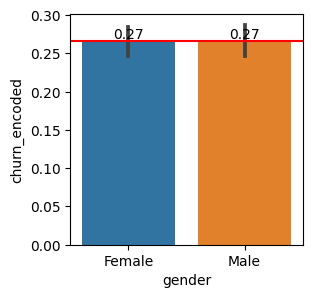

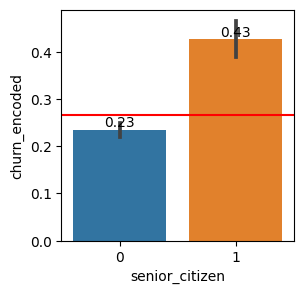

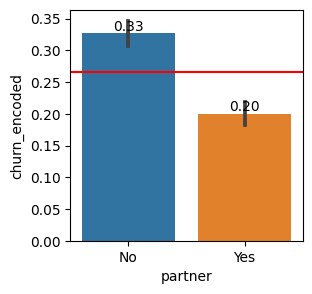

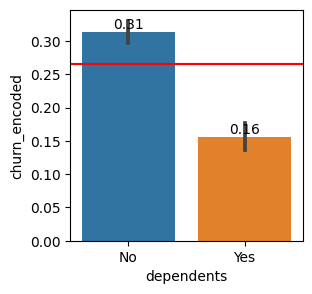

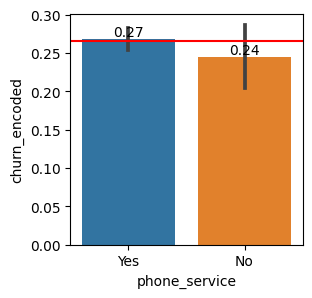

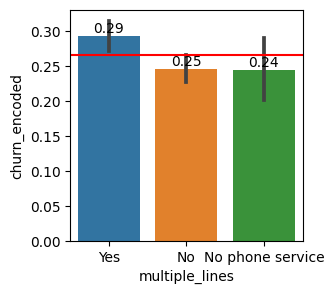

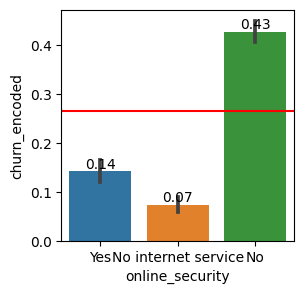

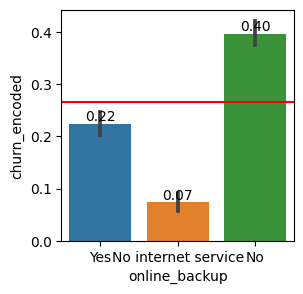

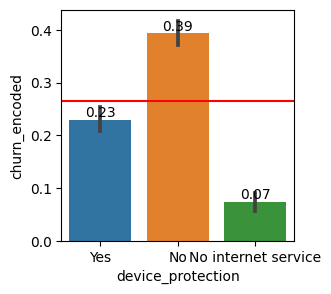

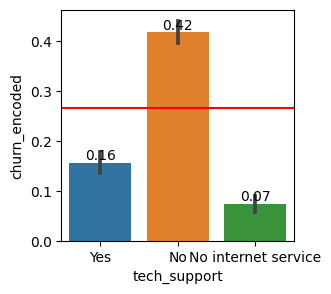

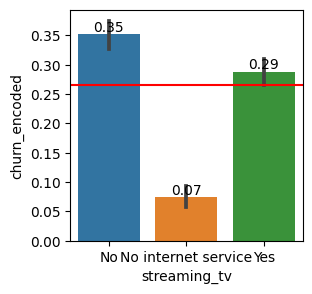

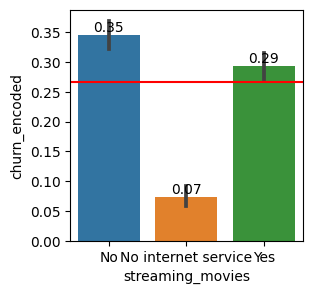

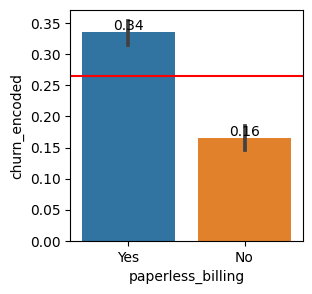

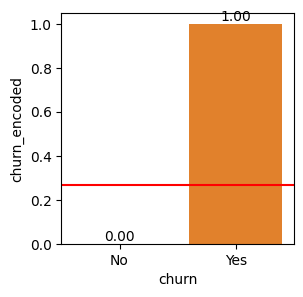

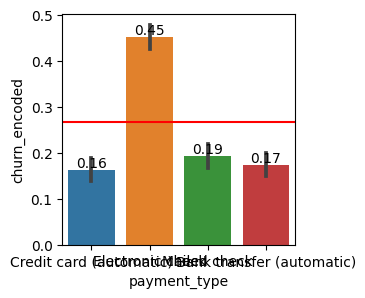

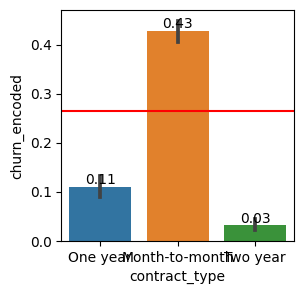

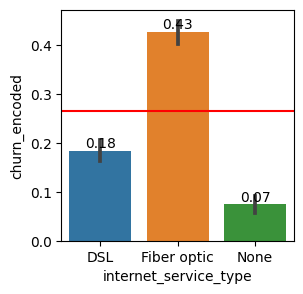

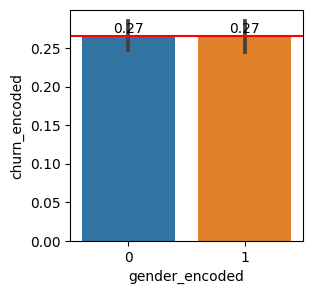

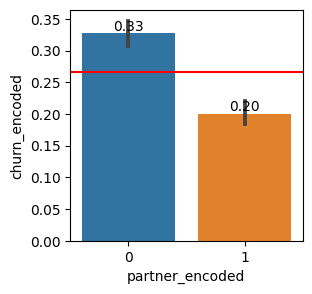

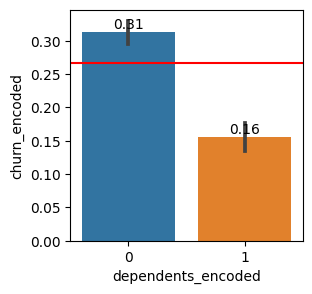

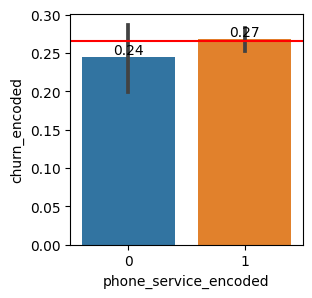

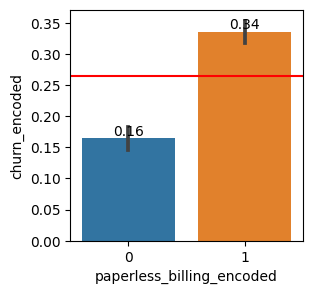

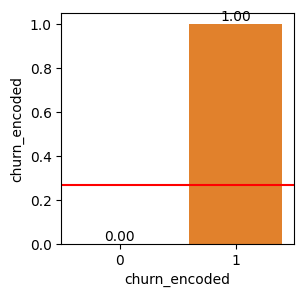

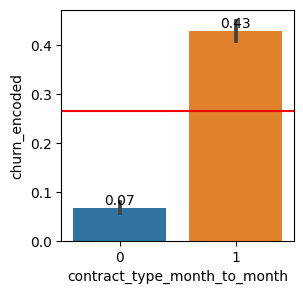

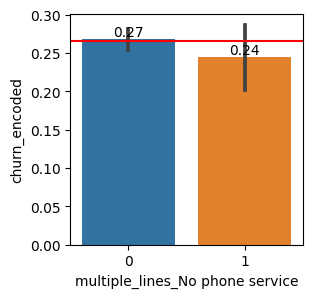

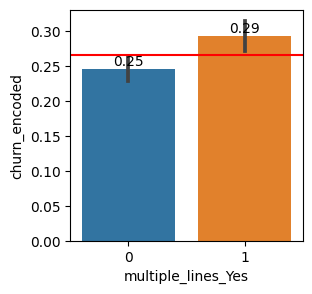

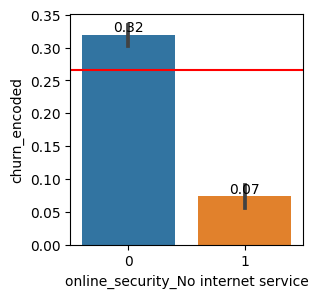

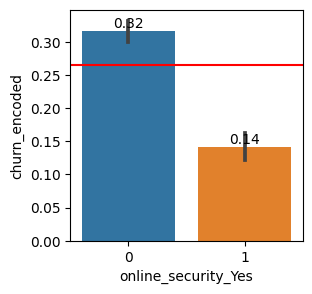

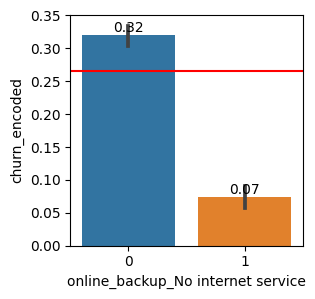

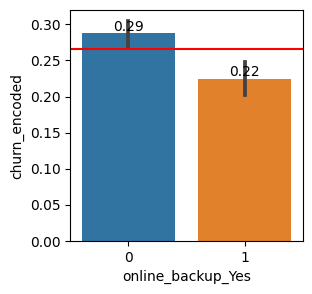

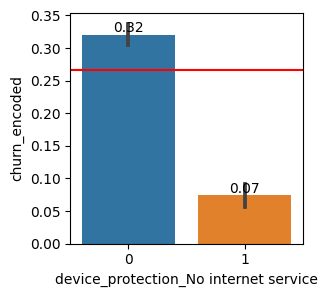

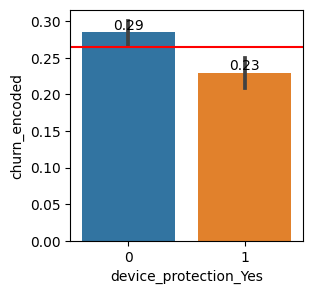

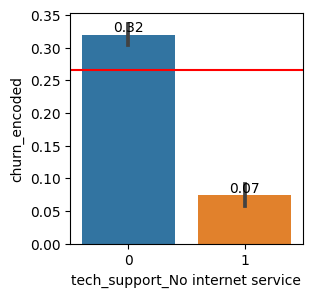

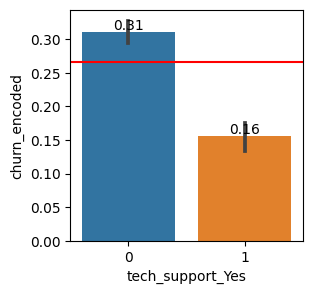

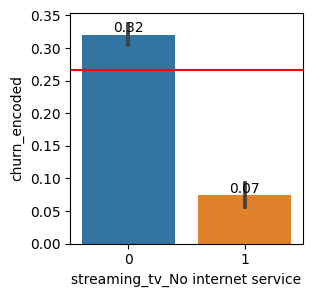

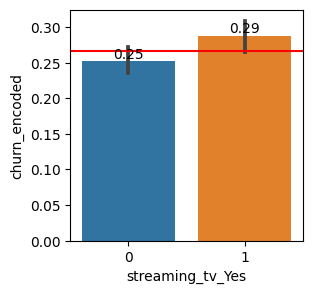

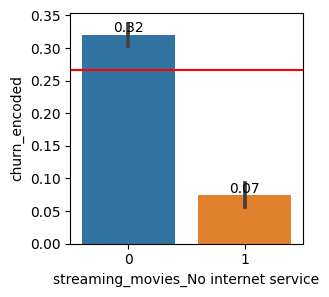

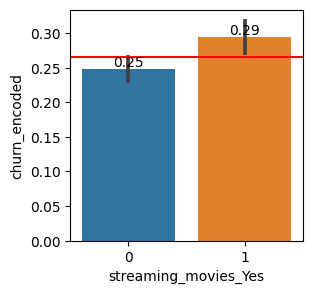

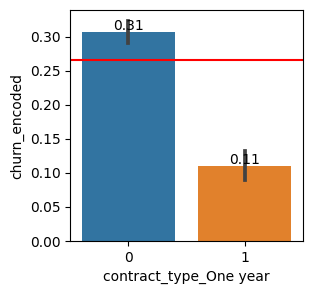

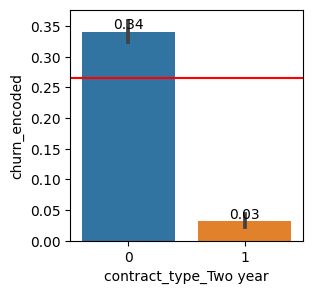

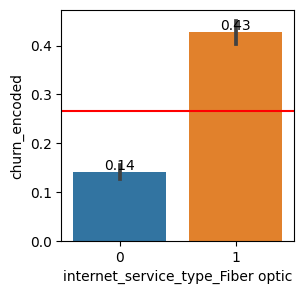

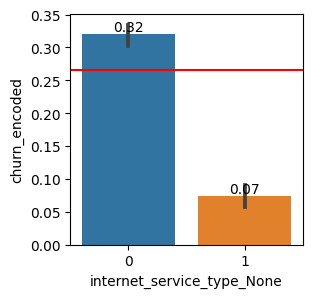

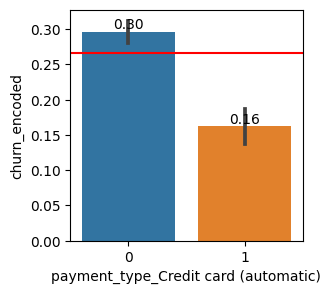

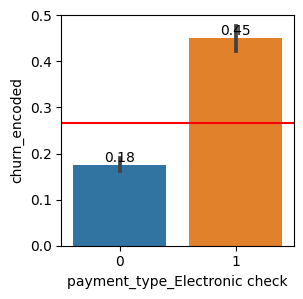

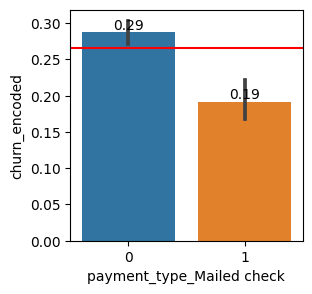

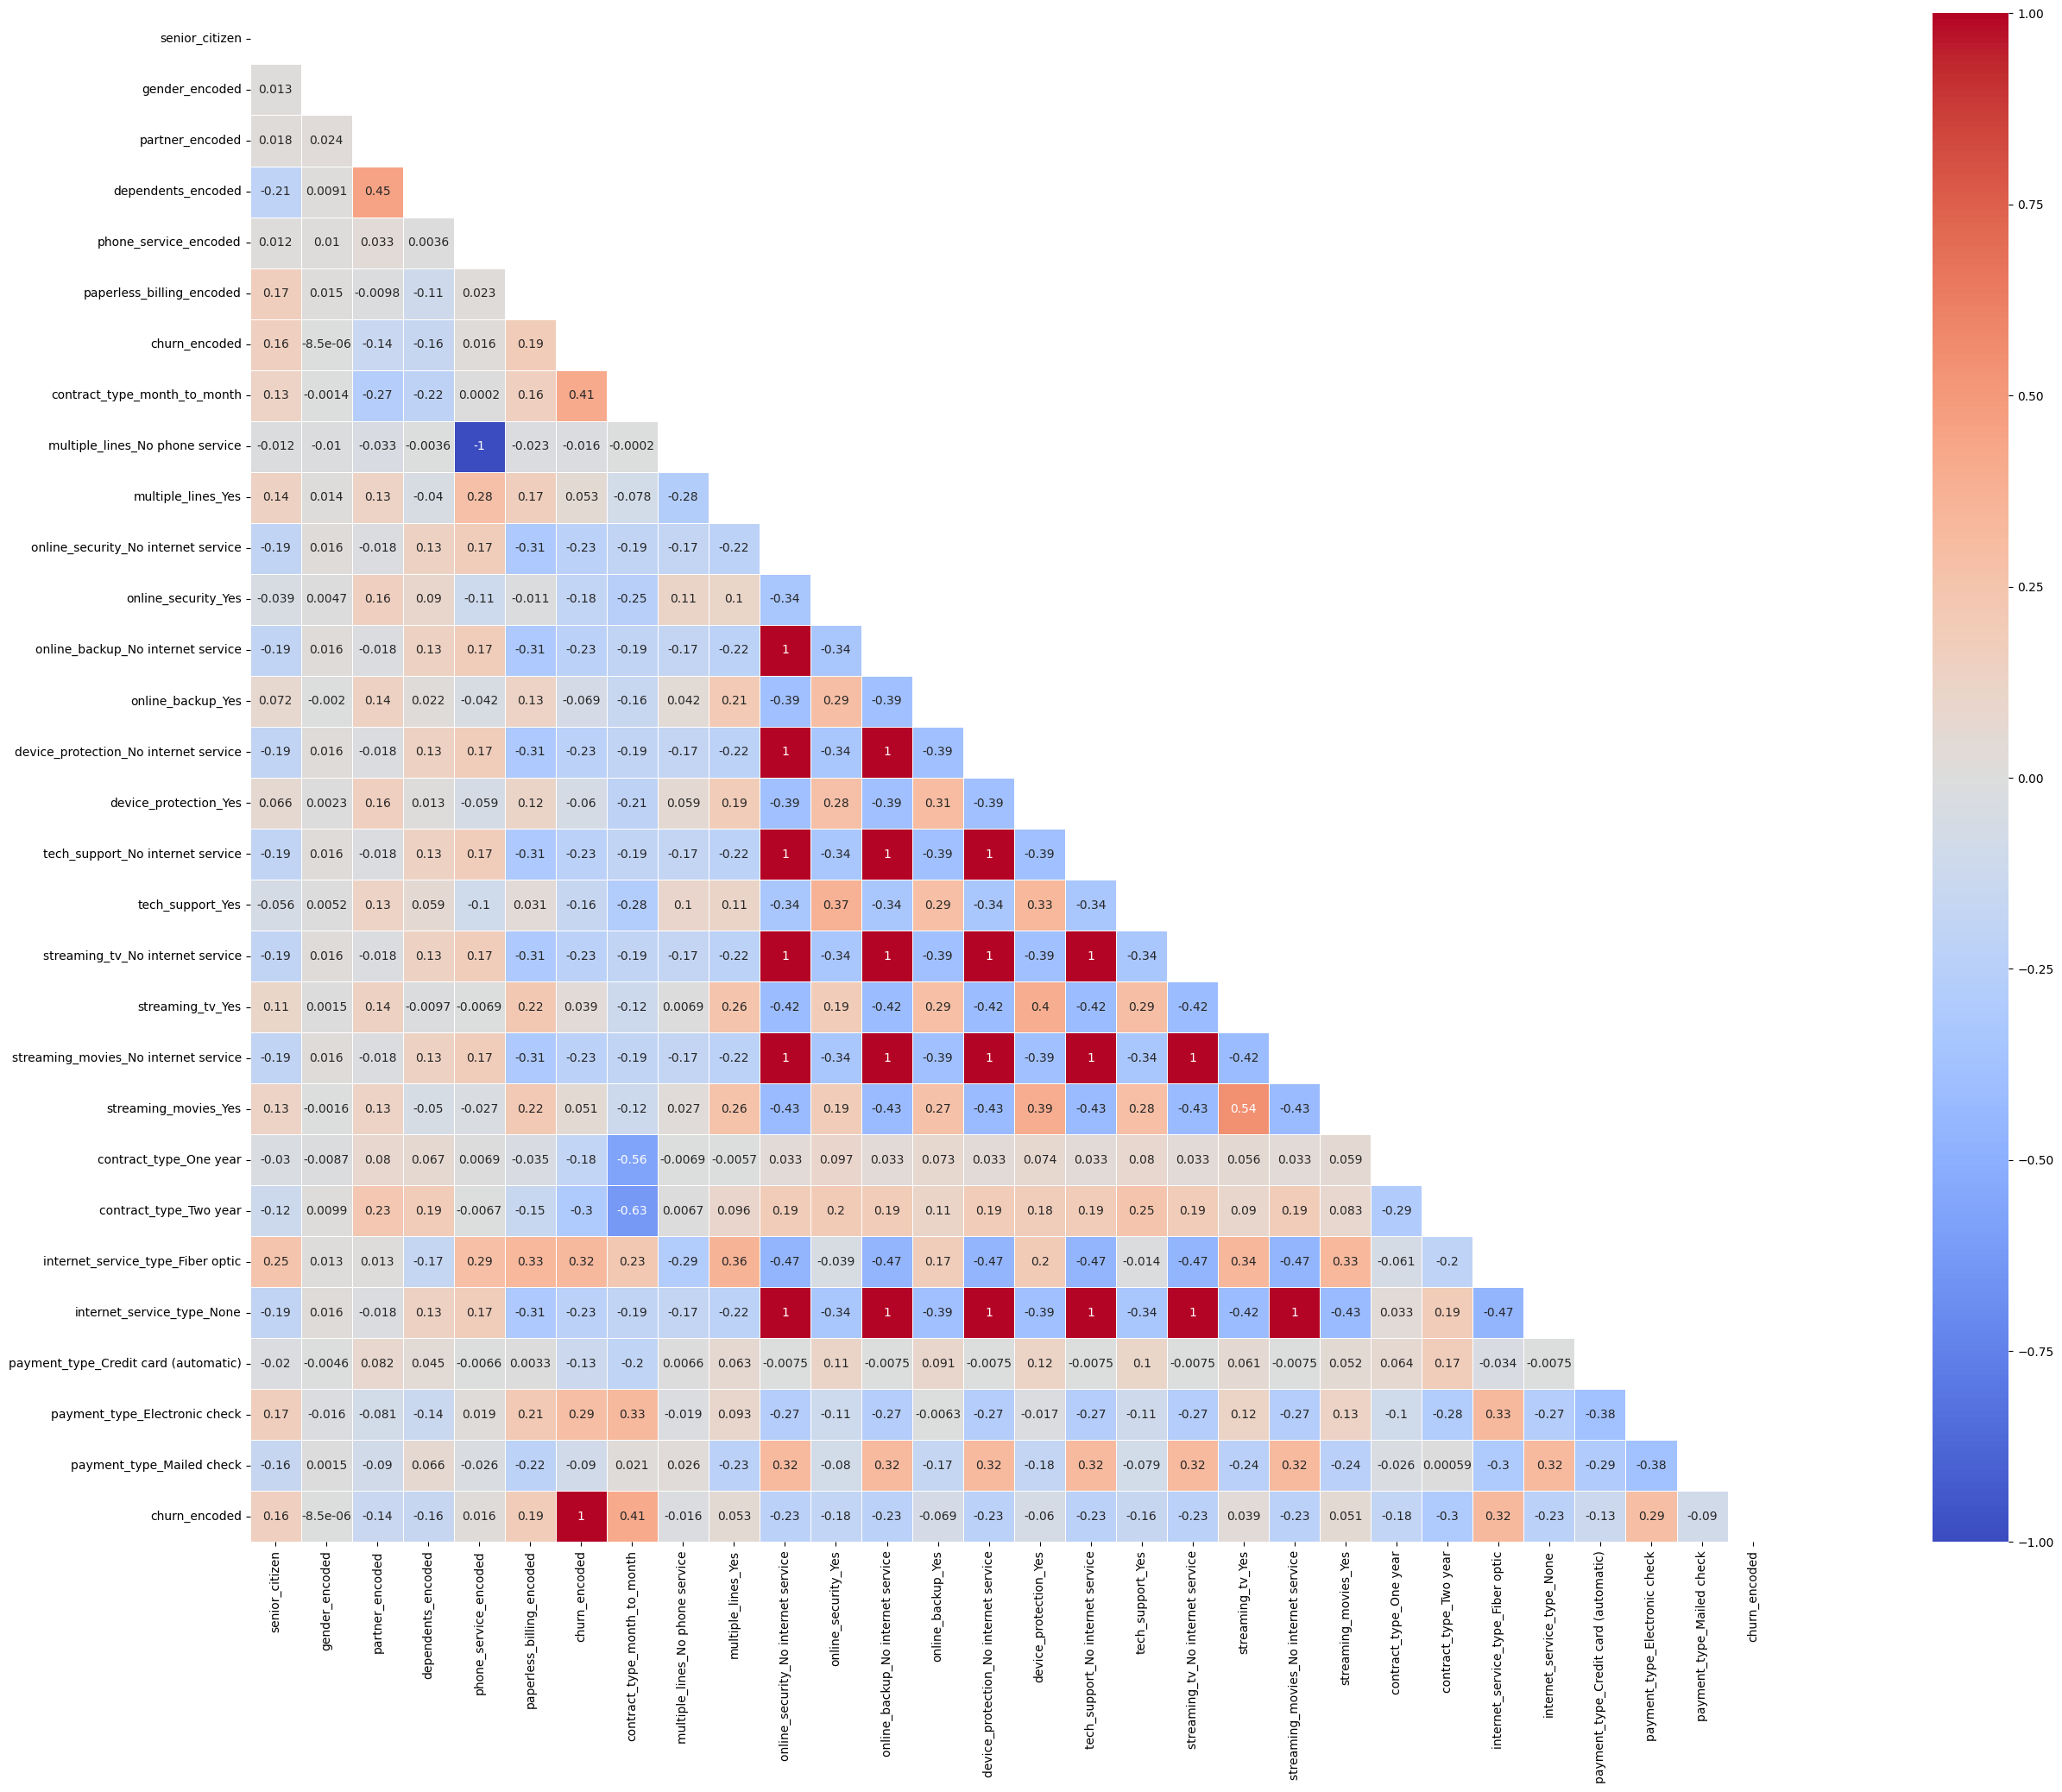

In [93]:
explore.explore_bivariate_cat_to_cat_target(train, 'churn_encoded')

## Possible relationships that drive customer churn: fiber optic internet, electronic check payments, two-year contracts, and month-to-month contracts

## "Do customers who use fiber optic services tend to churn more often?"

In [253]:
train['internet_service_type_Fiber optic'] = train['internet_service_type_Fiber optic'].replace({1: 'Yes', 0: 'No'})

Text(0.5, 1.0, 'Does Fiber Optic Usage Affect Churn?')

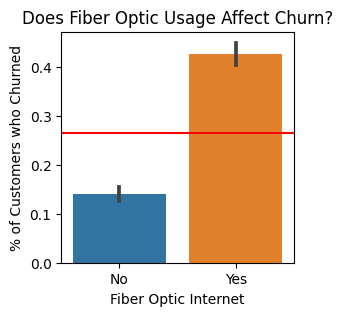

In [254]:
plt.figure(figsize=(3, 3)) 
sns.barplot(x='internet_service_type_Fiber optic', y='churn_encoded', data=train, estimator='mean')
ax = plt.gca()
plt.axhline(train['churn_encoded'].mean(), label=f'Total mean', color='red')
plt.xlabel('Fiber Optic Internet')
plt.ylabel('% of Customers who Churned')
plt.title('Does Fiber Optic Usage Affect Churn?')

In [164]:
#calculating the churn rate for echeck customers

train[(train['internet_service_type_Fiber optic'] == 1) & (train['churn_encoded'] == 1)].shape

(735, 49)

In [165]:
train[(train['internet_service_type_Fiber optic'] == 1) & (train['churn_encoded'] == 0)].shape

(987, 49)

In [166]:
735/(735+987)

0.4268292682926829

In [167]:
.4268/train['churn_encoded'].mean()

1.6064164435946464

## "Do customers who pay with electronic checks tend to churn more often?"

In [251]:
train['payment_type_Electronic check'] = train['payment_type_Electronic check'].replace({1: 'Yes', 0: 'No'})

Text(0.5, 1.0, 'Does eCheck Usage Affect Churn?')

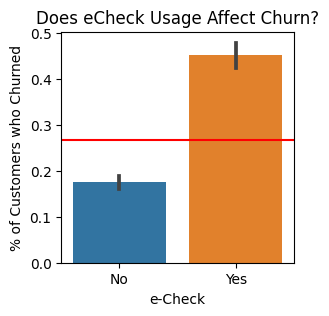

In [252]:
plt.figure(figsize=(3, 3)) 
sns.barplot(x='payment_type_Electronic check', y='churn_encoded', data=train, estimator='mean')
ax = plt.gca()
plt.axhline(train['churn_encoded'].mean(), label=f'Total mean', color='red')
plt.xlabel('e-Check')
plt.ylabel('% of Customers who Churned')
plt.title('Does eCheck Usage Affect Churn?')

In [159]:
train['payment_type_Electronic check'].unique()

array([0, 1], dtype=uint8)

In [160]:
#calculating the churn rate for echeck customers

train[(train['payment_type_Electronic check'] == 1) & (train['churn_encoded'] == 1)].shape

(581, 49)

In [161]:
train[(train['payment_type_Electronic check'] == 1) & (train['churn_encoded'] == 0)].shape

(708, 49)

In [162]:
581/1289

0.45073700543056633

In [163]:
.4507/train['churn_encoded'].mean()

1.6963727533460804

## "Do customers with a two-year contract tend to churn more often?"

In [147]:
train['contract_type_Two year'] = train['contract_type_Two year'].replace({1: 'Yes', 0: 'No'})

Text(0.5, 1.0, 'Do Non Two-Year Contracts Affect Churn?')

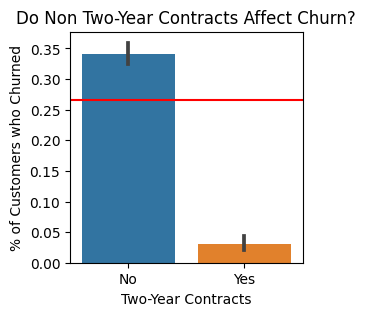

In [250]:
plt.figure(figsize=(3, 3)) 
sns.barplot(x='contract_type_Two year', y='churn_encoded', data=train, estimator='mean')
ax = plt.gca()
plt.axhline(train['churn_encoded'].mean(), label=f'Total mean', color='red')
plt.xlabel('Two-Year Contracts')
plt.ylabel('% of Customers who Churned')
plt.title('Do Non Two-Year Contracts Affect Churn?')

In [151]:
#calculating the churn rate for non-two year customers

train[(train['contract_type_Two year'] == 'No') & (train['churn_encoded'] == 1)].shape

(1016, 49)

In [152]:
train[(train['contract_type_Two year'] == 'No') & (train['churn_encoded'] == 0)].shape

(1964, 49)

In [155]:
1016/2980

0.3409395973154362

In [156]:
.3409/train['churn_encoded'].mean()

1.2831006692160611

## "Do customers with a month-to-month contract tend to churn more often?"

In [97]:
train['contract_type_month_to_month'].value_counts()

1    2165
0    1772
Name: contract_type_month_to_month, dtype: int64

In [ ]:
#calculating the churn rate for month to month customers

In [98]:
train[(train['contract_type_month_to_month'] == 1) & (train['churn_encoded'] == 1)].shape

(927, 49)

In [99]:
train[(train['contract_type_month_to_month'] == 1) & (train['churn_encoded'] == 0)].shape

(1238, 49)

In [100]:
927/2165

0.428175519630485

In [101]:
.42817/train['churn_encoded'].mean()

1.6115729349904397

In [141]:
train['contract_type_month_to_month'] = train['contract_type_month_to_month'].replace({1: 'Yes', 0: 'No'})

Text(0, 0.5, '% of Customers who Churned')

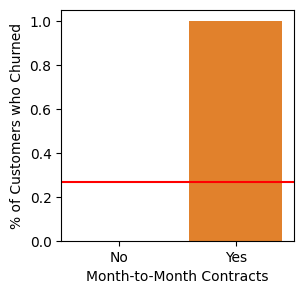

In [142]:
plt.figure(figsize=(3, 3)) 
sns.barplot(x='contract_type_month_to_month', y='churn_encoded', data=train, estimator='mean')
ax = plt.gca()
plt.axhline(train['churn_encoded'].mean(), label=f'Total mean', color='red')
plt.xlabel('Month-to-Month Contracts')
plt.ylabel('% of Customers who Churned')

## Conduct chi2 statistical testing to determine if these possible relationships are meaningful

In [103]:
# stores selected features in a list
stats_test_list = ['internet_service_type_Fiber optic', 'payment_type_Electronic check', 'contract_type_Two year', 'contract_type_month_to_month']

alpha = .05

# Loops through the list of selected feature columns, runs a chi2 stats test, and prints the results including 
# the relationship of the p-value to the alpha
for ele in stats_test_list:
    ctab = pd.crosstab(train.churn_encoded, train[ele])
    chi, p, _, _ = scipy.stats.chi2_contingency(ctab)
    print(f'''
Results for {ele}:
    
R value equals {round(chi, 3)}
P-value equals {p}
    ''')
    
    if p < alpha:
        print(f'The p value is lower than alpha. We can reject the null hypothesis. There is a meaningful relationship between {ele} and churn\n\n ----------------\n')
    else:
        print(f'The p value is higher than alpha. We cannot reject the null hypothesis. There is no meaningful relationship between {ele} and churn\n\n ----------------\n')
        


Results for internet_service_type_Fiber optic:
    
R value equals 405.921
P-value equals 2.831419548361709e-90
    
The p value is lower than alpha. We can reject the null hypothesis. There is a meaningful relationship between internet_service_type_Fiber optic and churn

 ----------------


Results for payment_type_Electronic check:
    
R value equals 334.98
P-value equals 7.910587922260644e-75
    
The p value is lower than alpha. We can reject the null hypothesis. There is a meaningful relationship between payment_type_Electronic check and churn

 ----------------


Results for contract_type_Two year:
    
R value equals 354.286
P-value equals 4.941935969249593e-79
    
The p value is lower than alpha. We can reject the null hypothesis. There is a meaningful relationship between contract_type_Two year and churn

 ----------------


Results for contract_type_month_to_month:
    
R value equals 649.133
P-value equals 3.4484593947893894e-143
    
The p value is lower than alpha. We c

## The features: 
### 'internet_service_type_Fiber optic', 
### 'payment_type_Electronic check', 
### 'contract_type_Two year', and 
### 'contract_type_month_to_month' 

### have all been shown to have a meaningful relationship with churn through chi squared statistical testing. These features will be used to develop a predictive classification model.

# Modeling

### Split the data

In [104]:
# create a baseline model and append it to the dataframe

In [105]:
stats_test_list = ['internet_service_type_Fiber optic', 'payment_type_Electronic check', 'contract_type_Two year', 'contract_type_month_to_month']

In [106]:
train.contract_type_month_to_month.astype(int)

5919    0
1915    0
5054    1
2355    1
6279    0
       ..
394     1
3763    1
3444    0
1002    1
4192    1
Name: contract_type_month_to_month, Length: 3937, dtype: int64

In [107]:
# split the data

selected_features = ['internet_service_type_Fiber optic', 'payment_type_Electronic check', 'contract_type_Two year', 'contract_type_month_to_month']

X_train = train[selected_features]
y_train = train.churn_encoded

X_validate = validate[stats_test_list]
y_validate = validate.churn_encoded

X_test = test[stats_test_list]
y_test = test.churn_encoded

### Create a baseline model

In [220]:
# makes a baseline prediction model and appends it to the dataframe
X_train['baseline_prediction'] = 0

In [221]:
X_train.baseline_prediction.shape

(3937,)

In [223]:
# Evaluate baseline accuracy
baseline_acc = (y_train == X_train['baseline_prediction']).mean()
print(f'Baseline accuracy is {round(baseline_acc, 2)}%')

Baseline accuracy is 0.73%


In [225]:
X_train = X_train.drop(columns='baseline_prediction')

In [216]:
X_train.head()

,internet_service_type_Fiber optic,payment_type_Electronic check,contract_type_Two year,contract_type_month_to_month
5919,0,0,0,0
1915,1,0,0,0
5054,0,1,0,1
2355,0,0,0,1
6279,0,0,0,0


## Build a knn classification model

## For simplicity, accuracy will be used to determine all model performance.

In [226]:
# creates a for-loop to create 20 different model with different k values
# these models will be evaluated to find the highest precision model

for i in range(1,21):
    #Make the thing
    knn = knc(n_neighbors=i) 
    
    #Train
    #Fit the thing
    knn.fit(X_train, y_train)
    #Make predictions
    y_pred = knn.predict(X_train)
    #Evaluate the model accuracy
    t_score = knn.score(X_train, y_train)
    
    #Validate
    #Make predictions
    val_pred = knn.predict(X_validate)
    #Evaluate the model accuracy
    t_score_val = knn.score(X_validate, y_validate)
    
    print(f'When k = {i},\n training accuracy = {round(t_score, 2)},\n validate accuracy = {round(t_score_val, 2)},\n difference = {round(abs(t_score - t_score_val), 2)}')
    #print(classification_report(y_train, y_pred))
    if t_score_val < baseline_acc:
        print('This model does not outperform the baseline.')
    else:
        print('This model outperforms the baseline.')
    print('\n\n----------\n')

When k = 1,
 training accuracy = 0.76,
 validate accuracy = 0.75,
 difference = 0.01
This model outperforms the baseline.


----------

When k = 2,
 training accuracy = 0.72,
 validate accuracy = 0.72,
 difference = 0.0
This model does not outperform the baseline.


----------

When k = 3,
 training accuracy = 0.73,
 validate accuracy = 0.72,
 difference = 0.01
This model does not outperform the baseline.


----------

When k = 4,
 training accuracy = 0.77,
 validate accuracy = 0.74,
 difference = 0.03
This model outperforms the baseline.


----------

When k = 5,
 training accuracy = 0.77,
 validate accuracy = 0.74,
 difference = 0.03
This model outperforms the baseline.


----------

When k = 6,
 training accuracy = 0.77,
 validate accuracy = 0.74,
 difference = 0.03
This model outperforms the baseline.


----------

When k = 7,
 training accuracy = 0.77,
 validate accuracy = 0.74,
 difference = 0.03
This model outperforms the baseline.


----------

When k = 8,
 training accuracy = 

## The knn model does not beat the baseline at predicting churn with these columns. It's best score is exactly 73%

## Build a decision tree classification model

In [227]:
clf = dtc(max_depth= 3, random_state=123)

In [228]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

In [229]:
clf.classes_

array([0, 1])

In [240]:
y_pred = clf.predict(X_test)

In [241]:
for i in range(1,21):
    clf = dtc(max_depth= i, random_state=123)
    clf.fit(X_train, y_train)
   # Calculate precision scores
    train_precision = precision_score(y_train, clf.predict(X_train))
    validate_precision = precision_score(y_validate, clf.predict(X_validate))
    t_score = knn.score(X_train, y_train)
    val_score = knn.score(X_validate, y_validate)

    # Print precision scores
    print(f'''
When max_depth is {i},
Training accuracy is {round(t_score, 2)},
Validate accuracy is {round(val_score, 2)}
Difference = {round(abs(t_score - val_score), 2)}
''')
    print(classification_report(y_test, y_pred))


When max_depth is 1,
Training accuracy is 0.78,
Validate accuracy is 0.76
Difference = 0.01

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1033
           1       0.59      0.44      0.50       374

    accuracy                           0.77      1407
   macro avg       0.70      0.66      0.68      1407
weighted avg       0.75      0.77      0.76      1407


When max_depth is 2,
Training accuracy is 0.78,
Validate accuracy is 0.76
Difference = 0.01

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1033
           1       0.59      0.44      0.50       374

    accuracy                           0.77      1407
   macro avg       0.70      0.66      0.68      1407
weighted avg       0.75      0.77      0.76      1407


When max_depth is 3,
Training accuracy is 0.78,
Validate accuracy is 0.76
Difference = 0.01

              precision    recall  f1-score   support

         

## The decision tree model doesn't outperform the baseline. It performs exactly at 73%

## build a random forest classification model

In [232]:
rf = rfc(min_samples_leaf=1, max_depth=10, random_state=123)

In [233]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [239]:
#tunes the min_sample_leaf hyperparameter

for i in range(1,11):
    rf = rfc(min_samples_leaf=i, max_depth=10, random_state=123)
    rf.fit(X_train, y_train)
    train_acc = rf.score(X_train, y_train)
    val_acc = rf.score(X_validate, y_validate)
    
    # Print precision scores
    print(f'''
When min_sample_leaf is {i},
Training precision is {round(train_precision, 2)},
Validate precision is {round(validate_precision, 2)}
Difference = {round(abs(train_precision - validate_precision), 2)}
''')
    if train_acc > baseline_acc:
        print('This model outperforms baseline accuracy.')
    else:
        print('This model does not outperform baseline accuracy.')
    print('-------------\n')
    
print(classification_report(y_test, y_pred))


When min_sample_leaf is 1,
Training precision is 0.62,
Validate precision is 0.58
Difference = 0.05

This model outperforms baseline accuracy.
-------------


When min_sample_leaf is 2,
Training precision is 0.62,
Validate precision is 0.58
Difference = 0.05

This model outperforms baseline accuracy.
-------------


When min_sample_leaf is 3,
Training precision is 0.62,
Validate precision is 0.58
Difference = 0.05

This model outperforms baseline accuracy.
-------------


When min_sample_leaf is 4,
Training precision is 0.62,
Validate precision is 0.58
Difference = 0.05

This model outperforms baseline accuracy.
-------------


When min_sample_leaf is 5,
Training precision is 0.62,
Validate precision is 0.58
Difference = 0.05

This model outperforms baseline accuracy.
-------------


When min_sample_leaf is 6,
Training precision is 0.62,
Validate precision is 0.58
Difference = 0.05

This model outperforms baseline accuracy.
-------------


When min_sample_leaf is 7,
Training precision

ValueError: Found input variables with inconsistent numbers of samples: [1407, 3937]

## There is no significant difference when the min_sample_leaf hyperparameter is tuned

In [215]:
for i in range(1,21):
    rf = rfc(min_samples_leaf=i, max_depth=10, random_state=123)
    rf.fit(X_train, y_train)
    # Calculate precision scores
    train_acc = rf.score(X_train, y_train)
    val_acc = rf.score(X_validate, y_validate)
    
    # Print precision scores
    print(f'''
When max_depth is {i},
Training accuracy is {round(train_acc, 2)},
Validate accuracy is {round(val_acc, 2)}
Difference = {round(abs(train_precision - validate_precision), 2)}
''')
    if val_acc > baseline_acc:
        print('This model outperforms baseline accuracy.')
    else:
        print('This model does not outperform baseline accuracy.')
    print('-------------\n')


When max_depth is 1,
Training accuracy is 0.78,
Validate accuracy is 0.76
Difference = 0.0



ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

---------------------------------

In [ ]:
df = acquire.get_telco_data()

In [ ]:
df = df[df['tenure'] > 59]

In [ ]:
stats_test_list = ['internet_service_type_Fiber optic', 'payment_type_Electronic check', 'contract_type_Two year', 'contract_type_month_to_month']

In [ ]:
train.contract_type_month_to_month.astype(int)

In [ ]:
# split the data

selected_features = ['internet_service_type_Fiber optic', 'payment_type_Electronic check', 'contract_type_Two year', 'contract_type_month_to_month']

X_train = train[selected_features]
y_train = train.churn_encoded

X_validate = validate[stats_test_list]
y_validate = validate.churn_encoded

X_test = test[stats_test_list]
y_test = test.churn_encoded

### Create a baseline model

In [ ]:
# makes a baseline prediction model and appends it to the dataframe
X_train['baseline_prediction'] = 0
X_train.baseline_prediction

In [ ]:
# Evaluate baseline accuracy
baseline_acc = (y_train == 0).mean()
print(f'Baseline accuracy is {round(baseline_acc, 2)}%')

In [ ]:
X_train.drop(columns='baseline_prediction')

## Build a knn classification model

## For simplicity, accuracy will be used to determine all model performance.

In [ ]:
# creates a for-loop to create 20 different model with different k values
# these models will be evaluated to find the highest precision model

for i in range(1,21):
    #Make the thing
    knn = knc(n_neighbors=i) 
    
    #Train
    #Fit the thing
    knn.fit(X_train, y_train)
    #Make predictions
    y_pred = knn.predict(X_train)
    #Evaluate the model accuracy
    t_score = knn.score(X_train, y_train)
    
    #Validate
    #Fit the thing
    knn.fit(X_validate, y_validate)
    #Make predictions
    val_pred = knn.predict(X_validate)
    #Evaluate the model accuracy
    t_score_val = knn.score(X_validate, y_validate)
    
    print(f'When k = {i},\n training accuracy = {round(t_score, 2)},\n validate accuracy = {round(t_score_val, 2)},\n difference = {round(abs(t_score - t_score_val), 2)}')
    #print(classification_report(y_train, y_pred))
    if t_score_val < baseline_acc:
        print('This model does not outperform the baseline.')
    else:
        print('This model outperforms the baseline.')
    print('\n\n----------\n')

## The knn model does not beat the baseline at predicting churn with these columns. It's best score is exactly 73%

## Build a decision tree classification model

In [ ]:
clf = dtc(max_depth= 3, random_state=123)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
clf.classes_

In [ ]:
y_pred = clf.predict(X_train)

In [ ]:
for i in range(1,21):
    clf = dtc(max_depth= i, random_state=123)
    clf.fit(X_train, y_train)
   # Calculate precision scores
    train_precision = precision_score(y_train, clf.predict(X_train))
    validate_precision = precision_score(y_validate, clf.predict(X_validate))
    t_score = knn.score(X_train, y_train)
    val_score = knn.score(X_validate, y_validate)

    # Print precision scores
    print(f'''
When max_depth is {i},
Training accuracy is {round(t_score, 2)},
Validate accuracy is {round(val_score, 2)}
Difference = {round(abs(t_score - val_score), 2)}
''')
    if t_score > baseline_acc:
        print('This model outperforms baseline accuracy.')
    else:
        print('This model does not outperform baseline accuracy.')
    print('-------------\n')

## The decision tree model doesn't outperform the baseline. It performs exactly at 73%

## build a random forest classification model

In [ ]:
rf = rfc(min_samples_leaf=1, max_depth=10, random_state=123)

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
#tunes the min_sample_leaf hyperparameter

for i in range(1,11):
    rf = rfc(min_samples_leaf=i, max_depth=10, random_state=123)
    rf.fit(X_train, y_train)
    train_acc = rf.score(X_train, y_train)
    val_acc = rf.score(X_validate, y_validate)
    
    # Print precision scores
    print(f'''
When min_sample_leaf is {i},
Training precision is {round(train_precision, 2)},
Validate precision is {round(validate_precision, 2)}
Difference = {round(abs(train_precision - validate_precision), 2)}
''')
    if train_acc > baseline_acc:
        print('This model outperforms baseline accuracy.')
    else:
        print('This model does not outperform baseline accuracy.')
    print('-------------\n')

## There is no significant difference when the min_sample_leaf hyperparameter is tuned

In [ ]:
for i in range(1,21):
    rf = rfc(min_samples_leaf=i, max_depth=10, random_state=123)
    rf.fit(X_train, y_train)
    # Calculate precision scores
    train_acc = rf.score(X_train, y_train)
    val_acc = rf.score(X_validate, y_validate)
    
    # Print precision scores
    print(f'''
When max_depth is {i},
Training accuracy is {round(train_acc, 2)},
Validate accuracy is {round(val_acc, 2)}
Difference = {round(abs(train_precision - validate_precision), 2)}
''')
    if val_acc > baseline_acc:
        print('This model outperforms baseline accuracy.')
    else:
        print('This model does not outperform baseline accuracy.')
    print('-------------\n')

## No significant difference when the max_depth hyperparameter is tuned

## The random forest model outperforms baseline

## The test accuracy of the random forest model is 77%, or 4% above baseline

# Conclusion:
### What drives customer churn?

### Two year contracts, month-to-month contracts, fiber optic internet, and electronic check payments drive customer churn and tracking this data will help identify customers at risk of churn through modeling

## Recommendations:

### Implement this model to detect customer accounts at risk of churn


### Next Steps:

### Conduct further feature analysis to refine the model

In [ ]:
def get_telco_churn_last_year():
    ''' This function checks to see if a csv with the telco data exists, and if not,
        runs a SQL query to pull from database and save it in a new csv file.'''
    filename = 'telcochurnlastyear.csv'

    if os.path.isfile(filename):
        return pd.read_csv(filename)

    else:
        sql = '''
USE telco_churn;
SELECT * FROM customer_signups
JOIN customer_churn ON customer_signups.customer_id = customer_churn.customer_id
WHERE '2021-12-31' < signup_date < '2023-01-01';
                '''

        df = pd.read_sql(sql, get_db_url('telco_churn'))

        df.to_csv(filename, index=False)

        return df

In [168]:
import os
import acquire

df_1 = acquire.get_telco_churn_last_year()
df_1.head()

,customer_id,signup_date,customer_id.1,churn_month
0,0004-TLHLJ,2021-09-21 18:07:34,0004-TLHLJ,2022-01-31
1,0011-IGKFF,2020-12-21 18:07:34,0011-IGKFF,2022-01-31
2,0013-EXCHZ,2021-10-21 18:07:34,0013-EXCHZ,2022-01-31
3,0022-TCJCI,2018-04-21 18:07:34,0022-TCJCI,2022-01-31
4,0023-HGHWL,2021-12-21 18:07:34,0023-HGHWL,2022-01-31


In [169]:
df_1 = df_1.drop(columns='customer_id.1')

In [173]:
2 < 3 < 4

True

In [174]:
df.head()

,Unnamed: 0,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,payment_type,contract_type,internet_service_type
0,0,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,Mailed check,One year,DSL
1,1,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.9,542.4,No,Mailed check,Month-to-month,DSL
2,2,Male,0,No,No,4,Yes,No,No,No,...,No,No,No,Yes,73.9,280.85,Yes,Electronic check,Month-to-month,Fiber optic
3,3,Male,1,Yes,No,13,Yes,No,No,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Electronic check,Month-to-month,Fiber optic
4,4,Female,1,Yes,No,3,Yes,No,No,No,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Mailed check,Month-to-month,Fiber optic


In [177]:
df[(5 < df.tenure) & (df.tenure < 10)]

,Unnamed: 0,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,payment_type,contract_type,internet_service_type
0,0,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.60,593.3,No,Mailed check,One year,DSL
1,1,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.90,542.4,No,Mailed check,Month-to-month,DSL
5,5,Female,0,No,Yes,9,Yes,No,No,No,...,Yes,Yes,Yes,Yes,69.40,571.45,No,Credit card (automatic),Month-to-month,DSL
8,8,Female,1,No,No,7,Yes,No,Yes,No,...,No,No,No,Yes,48.20,340.35,No,Electronic check,Month-to-month,DSL
55,55,Female,0,Yes,No,6,Yes,Yes,No,No,...,No,No,No,No,50.35,314.55,No,Electronic check,Month-to-month,DSL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7006,7006,Female,0,Yes,No,9,Yes,Yes,Yes,Yes,...,No,No,No,No,91.75,865.8,Yes,Bank transfer (automatic),Month-to-month,Fiber optic
7017,7017,Male,1,Yes,No,6,Yes,Yes,No,No,...,No,No,No,Yes,80.80,457.1,No,Electronic check,Month-to-month,Fiber optic
7023,7023,Male,1,No,No,9,Yes,Yes,No,No,...,No,No,Yes,Yes,83.85,790.15,Yes,Electronic check,Month-to-month,Fiber optic
7026,7026,Female,0,No,No,6,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,No,19.70,129.55,No,Credit card (automatic),Month-to-month,None


In [203]:
df_1['churn_month'] = pd.to_datetime(df_1.churn_month)

In [193]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1869 entries, 0 to 1868
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_id  1869 non-null   object        
 1   signup_date  1869 non-null   object        
 2   churn_month  1869 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 43.9+ KB


In [204]:
df_1[(pd.to_datetime('2021-12-31') < df_1['churn_month']) & (df_1['churn_month']< pd.to_datetime('2023-01-01'))]
                                                             
                                                             
                                                             

,customer_id,signup_date,churn_month
0,0004-TLHLJ,2021-09-21 18:07:34,2022-01-31
1,0011-IGKFF,2020-12-21 18:07:34,2022-01-31
2,0013-EXCHZ,2021-10-21 18:07:34,2022-01-31
3,0022-TCJCI,2018-04-21 18:07:34,2022-01-31
4,0023-HGHWL,2021-12-21 18:07:34,2022-01-31
...,...,...,...
1864,9961-JBNMK,2020-04-21 18:07:34,2022-01-31
1865,9965-YOKZB,2021-04-21 18:07:34,2022-01-31
1866,9985-MWVIX,2021-12-21 18:07:34,2022-01-31
1867,9986-BONCE,2021-09-21 18:07:34,2022-01-31


In [198]:
df_1.churn_month = df_1.churn_month.astype(str)

In [201]:
df_1[df_1.churn_month.str.contains('2022')]

,customer_id,signup_date,churn_month
0,0004-TLHLJ,2021-09-21 18:07:34,2022-01-31
1,0011-IGKFF,2020-12-21 18:07:34,2022-01-31
2,0013-EXCHZ,2021-10-21 18:07:34,2022-01-31
3,0022-TCJCI,2018-04-21 18:07:34,2022-01-31
4,0023-HGHWL,2021-12-21 18:07:34,2022-01-31
...,...,...,...
1864,9961-JBNMK,2020-04-21 18:07:34,2022-01-31
1865,9965-YOKZB,2021-04-21 18:07:34,2022-01-31
1866,9985-MWVIX,2021-12-21 18:07:34,2022-01-31
1867,9986-BONCE,2021-09-21 18:07:34,2022-01-31


In [61]:
merged_df = pd.merge(df_1, df)

In [63]:
merged_df

,customer_id,signup_date,churn_month,Unnamed: 0,internet_service_type_id,contract_type_id,payment_type_id,gender,senior_citizen,partner,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,payment_type,contract_type,internet_service_type
0,0004-TLHLJ,2021-09-21 18:07:34,2022-01-31,2,2,1,1,Male,0,No,...,No,No,No,Yes,73.90,280.85,Yes,Electronic check,Month-to-month,Fiber optic
1,0011-IGKFF,2020-12-21 18:07:34,2022-01-31,3,2,1,1,Male,1,Yes,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Electronic check,Month-to-month,Fiber optic
2,0013-EXCHZ,2021-10-21 18:07:34,2022-01-31,4,2,1,2,Female,1,Yes,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Mailed check,Month-to-month,Fiber optic
3,0022-TCJCI,2018-04-21 18:07:34,2022-01-31,18,1,2,4,Male,1,No,...,No,No,Yes,No,62.70,2791.5,Yes,Credit card (automatic),One year,DSL
4,0023-HGHWL,2021-12-21 18:07:34,2022-01-31,19,1,1,1,Male,1,No,...,No,No,No,Yes,25.10,25.1,Yes,Electronic check,Month-to-month,DSL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,9961-JBNMK,2020-04-21 18:07:34,2022-01-31,7020,2,1,3,Male,1,No,...,No,Yes,Yes,Yes,96.80,2030.3,Yes,Bank transfer (automatic),Month-to-month,Fiber optic
1865,9965-YOKZB,2021-04-21 18:07:34,2022-01-31,7023,2,1,1,Male,1,No,...,No,No,Yes,Yes,83.85,790.15,Yes,Electronic check,Month-to-month,Fiber optic
1866,9985-MWVIX,2021-12-21 18:07:34,2022-01-31,7036,2,1,2,Female,0,No,...,No,No,No,Yes,70.15,70.15,Yes,Mailed check,Month-to-month,Fiber optic
1867,9986-BONCE,2021-09-21 18:07:34,2022-01-31,7037,3,1,3,Female,0,No,...,No internet service,No internet service,No internet service,No,20.95,85.5,Yes,Bank transfer (automatic),Month-to-month,None


In [65]:
merged_df = merged_df.drop(columns=['signup_date','churn_month'])

In [66]:
merged_df.head()

,customer_id,Unnamed: 0,internet_service_type_id,contract_type_id,payment_type_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,payment_type,contract_type,internet_service_type
0,0004-TLHLJ,2,2,1,1,Male,0,No,No,4,...,No,No,No,Yes,73.9,280.85,Yes,Electronic check,Month-to-month,Fiber optic
1,0011-IGKFF,3,2,1,1,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Electronic check,Month-to-month,Fiber optic
2,0013-EXCHZ,4,2,1,2,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Mailed check,Month-to-month,Fiber optic
3,0022-TCJCI,18,1,2,4,Male,1,No,No,45,...,No,No,Yes,No,62.7,2791.5,Yes,Credit card (automatic),One year,DSL
4,0023-HGHWL,19,1,1,1,Male,1,No,No,1,...,No,No,No,Yes,25.1,25.1,Yes,Electronic check,Month-to-month,DSL
